In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [10]:
df = pd.read_csv(r"C:\Users\singh\OneDrive\Documents\country wise latest.csv")
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [11]:
# Strip whitespace from country names
df['Country/Region'] = df['Country/Region'].str.strip()

# Fill missing values with 0
df = df.fillna(0)

# Check basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


C:\Users\singh\AppData\Local\Temp\ipykernel_8200\544784257.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_confirmed, x="Confirmed", y="Country/Region", palette="Reds_r")


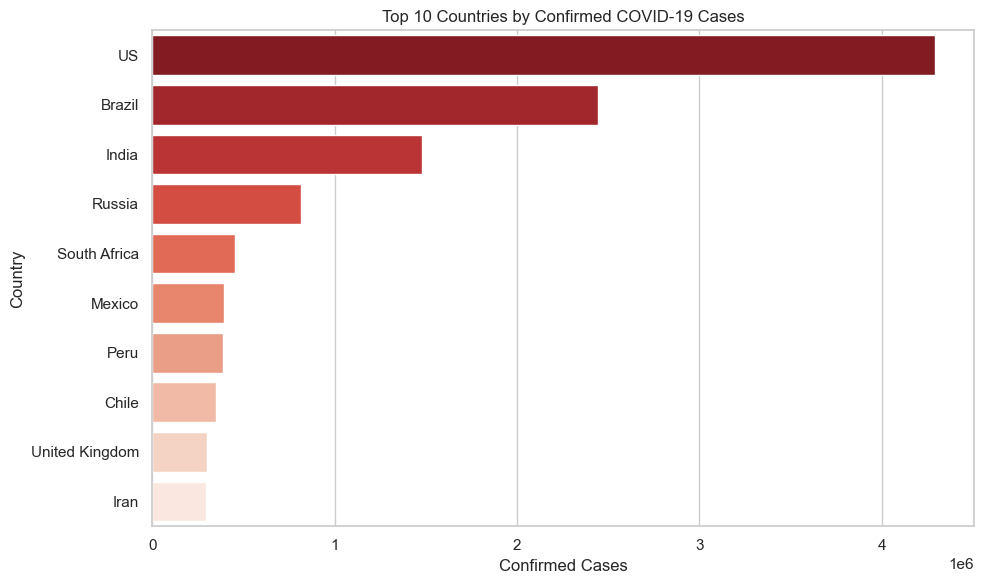

In [12]:
top_confirmed = df.sort_values(by="Confirmed",ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_confirmed, x="Confirmed", y="Country/Region", palette="Reds_r")
plt.title("Top 10 Countries by Confirmed COVID-19 Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


C:\Users\singh\AppData\Local\Temp\ipykernel_8200\3669624537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_death_rate, x="Deaths / 100 Cases", y="Country/Region", palette="Blues_r")


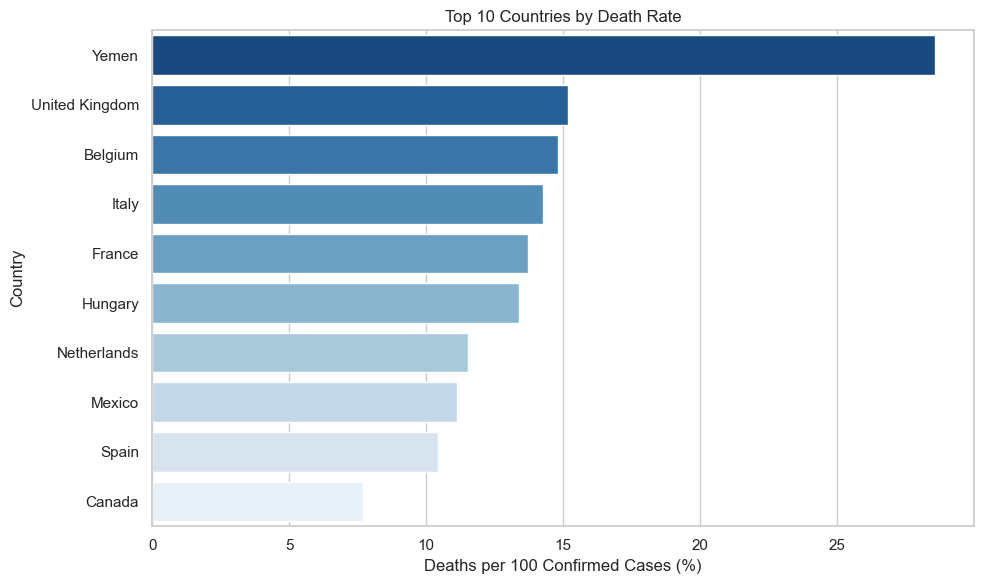

In [13]:
top_death_rate = df[df["Confirmed"] > 1000].sort_values(by="Deaths / 100 Cases", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_death_rate, x="Deaths / 100 Cases", y="Country/Region", palette="Blues_r")
plt.title("Top 10 Countries by Death Rate")
plt.xlabel("Deaths per 100 Confirmed Cases (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [14]:
region_summary = df.groupby("WHO Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum().reset_index()
region_summary


,WHO Region,Confirmed,Deaths,Recovered,Active
0,Africa,723207,12223,440645,270339
1,Americas,8839286,342732,4468616,4027938
2,Eastern Mediterranean,1490744,38339,1201400,251005
3,Europe,3299523,211144,1993723,1094656
4,South-East Asia,1835297,41349,1156933,637015
5,Western Pacific,292428,8249,206770,77409


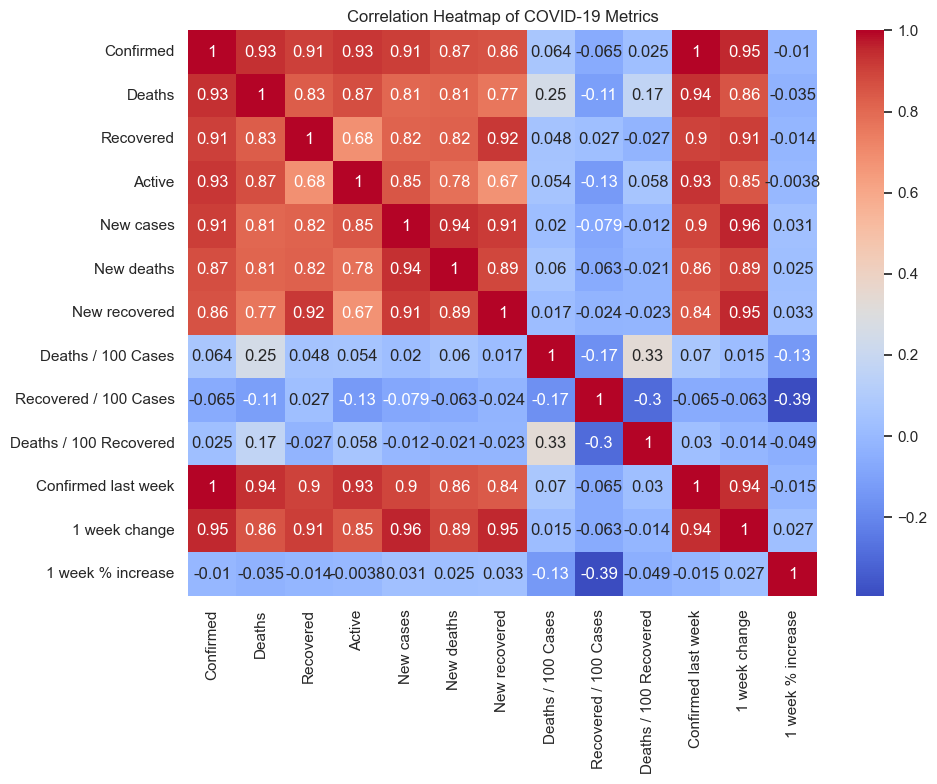

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of COVID-19 Metrics")
plt.tight_layout()
plt.show()


C:\Users\singh\AppData\Local\Temp\ipykernel_8200\2019942861.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_growth, x="1 week % increase", y="Country/Region", palette="Greens_r")


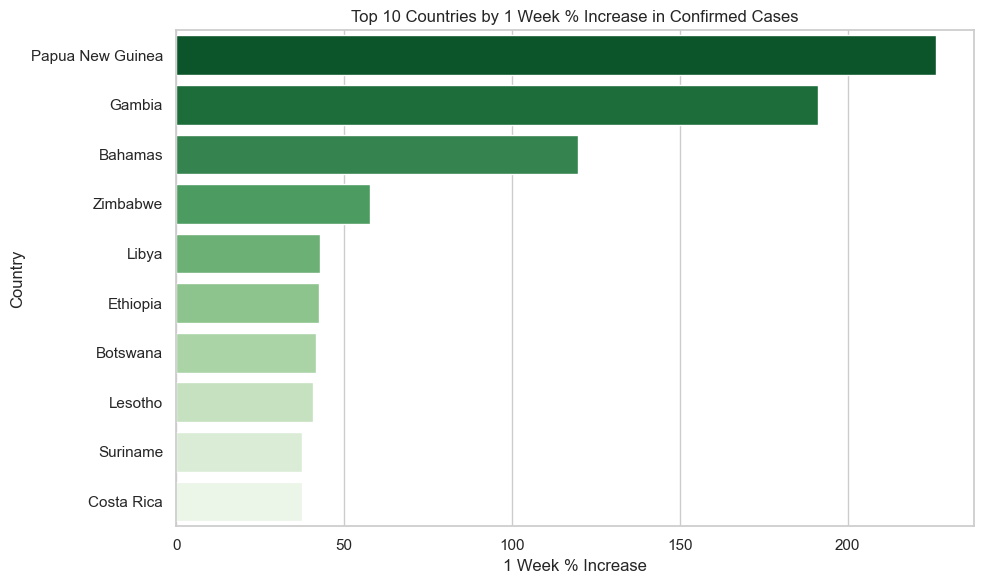

In [16]:
top_growth = df.sort_values(by="1 week % increase", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_growth, x="1 week % increase", y="Country/Region", palette="Greens_r")
plt.title("Top 10 Countries by 1 Week % Increase in Confirmed Cases")
plt.xlabel("1 Week % Increase")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [18]:
# Export full cleaned dataset
df.to_csv("cleaned_covid_data.csv", index=False)
